Determine if the car should go fast or slow according to the bumpiness and slope of the route.

In [2]:
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/terrain.csv")

In [ ]:
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


In [4]:
X = df[["bumpiness","grade"]]
y = df["target"]

def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

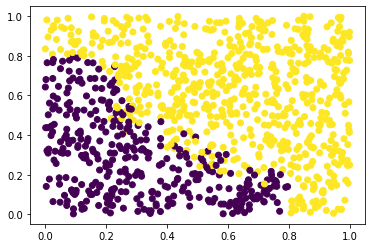

In [ ]:
plt.scatter(df['bumpiness'], df['grade'], c = df['target'])

In [ ]:
#Library
from sklearn.linear_model import LogisticRegression

#Instance
clf = LogisticRegression()

#Train
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.predict([[.5,.6]])

array([1.])

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, scoring='accuracy').mean()

0.9380000000000001

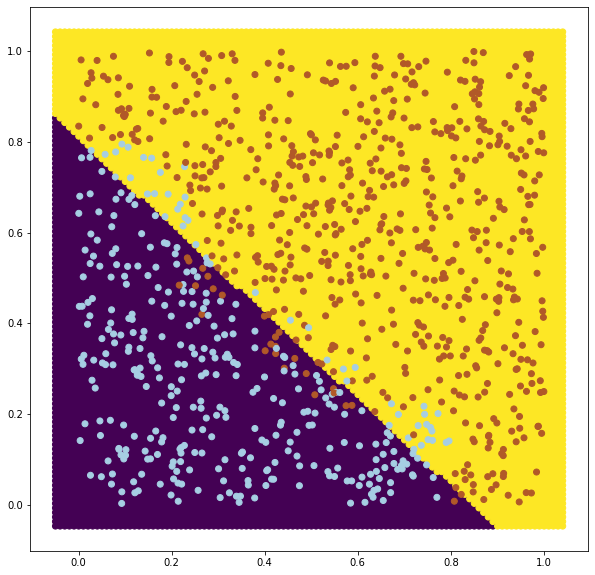

In [ ]:
draw(clf, X.values, y.values, 0.01)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
cross_val_score(clf, X, y , scoring = 'accuracy').mean()

0.9380000000000001

In [ ]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

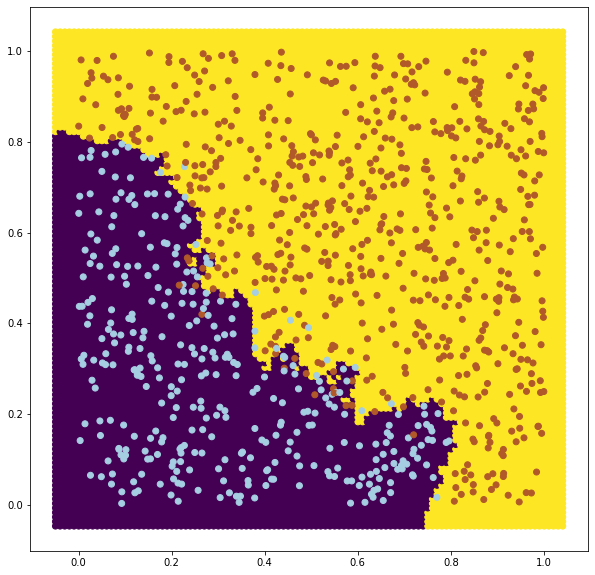

In [ ]:
draw(clf, X.values, y.values, 0.01)

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(), param_grid={"n_neighbors":np.arange(2,100)})
clf.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [ ]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [ ]:
clf.best_params_

{'n_neighbors': 16}

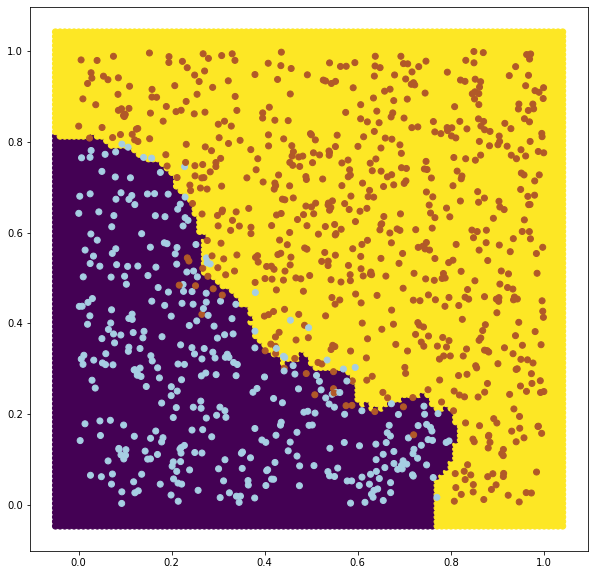

In [ ]:
draw(clf, X.values, y.values, 0.01 )

In [ ]:
cross_val_score(clf, X, y , scoring = 'accuracy').mean()

0.952

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
clfk = KNeighborsClassifier(n_neighbors=16)
clfk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [12]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test, clfk.predict(X_test))

array([[109,   7],
       [  8, 206]])

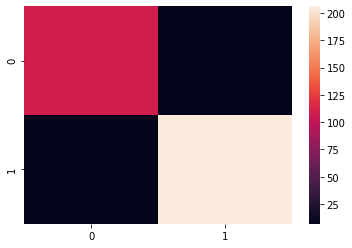

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, clfk.predict(X_test)))

In [18]:
from sklearn.metrics import classification_report


In [19]:
print(classification_report(y_test, clfk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       116
         1.0       0.97      0.96      0.96       214

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clfs = GridSearchCV(SVC(kernel="rbf"), param_grid = {'gamma':[10,10,1000], 'C':[1,10,100], 'degree':(2,8,2)},
                    scoring = 'accuracy')
clfs.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'degree': (2, 8, 2),
                         'gamma': [10, 10, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [56]:
clfs.best_params_

{'C': 100, 'degree': 2, 'gamma': 10}

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
clfd = DecisionTreeClassifier(max_depth=3)

In [59]:
clfd.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

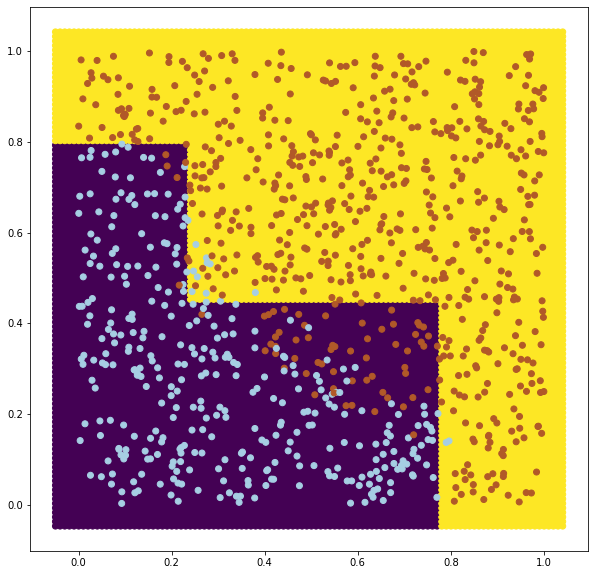

In [60]:
draw(clfd, X.values, y.values, 0.01)

In [70]:
clfd = GridSearchCV(DecisionTreeClassifier(), param_grid = {'max_depth':np.arange(2,7), 'min_samples_leaf':(50,100,200)},
                    scoring = 'accuracy')
clfd.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6]),
             

In [71]:
clfd.best_params_

{'max_depth': 4, 'min_samples_leaf': 50}

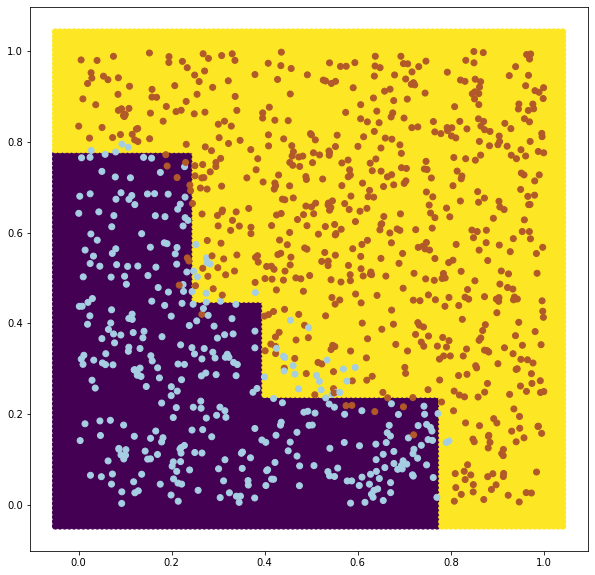

In [74]:
draw(clfd, X.values, y.values, 0.01)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
clfr = RandomForestClassifier(max_depth=4, n_estimators=100)

In [79]:
cross_val_score(clfr, X, y).mean()

0.945

In [86]:
clfr = GridSearchCV(RandomForestClassifier(), param_grid = {'max_depth':np.arange(3,8), 'n_estimators':(50,100,200)})
clfr.fit(X,y) 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [87]:
clfr.best_params_

{'max_depth': 5, 'n_estimators': 200}

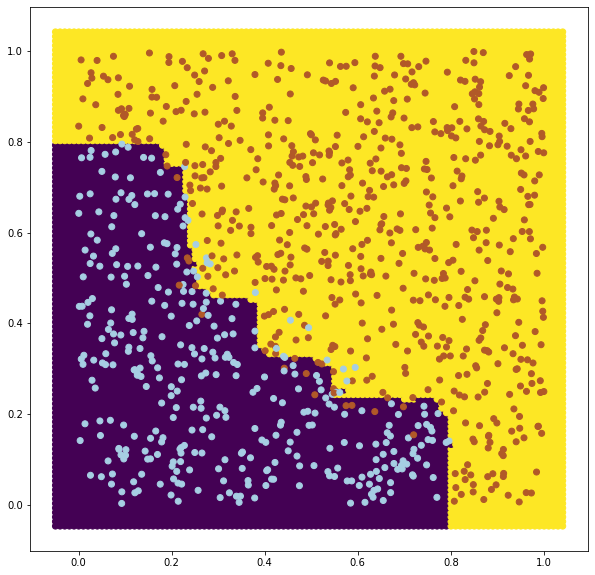

In [85]:
draw(clfr, X.values, y.values, 0.01)